# How to use Google Colab
#  

### MNIST, Convolutional Neural Network (CNN)

### Step - 3

### MNIST由手寫阿拉伯數字組成，包含60,000個訓練樣本和10,000個測試樣本。

##### data from: https://keras.io/datasets/#mnist-database-of-handwritten-digits
##### code modified from: TensorFlow+Keras[深度學習]人工智慧實務應用 / 林大貴


# (1) Import the data from Keras

In [21]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(3)

In [22]:
# read in the file
import keras
import tensorflow as tf 

tf.keras.datasets.mnist.load_data(path="mnist.npz")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# (2) View the first 10 images and labels

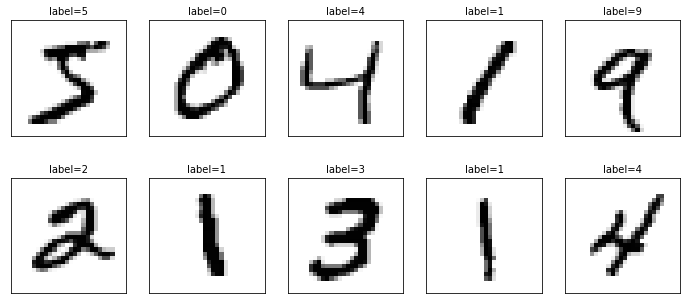

In [23]:
fig = plt.gcf()
fig.set_size_inches(12,14)

for i in range(0,10):
    ax=plt.subplot(5,5,1+i)
    ax.imshow(x_train[i], cmap='binary')
    title= "label=" +str(y_train[i])
    ax.set_title(title,fontsize=10) 
    ax.set_xticks([]);ax.set_yticks([])        
plt.show()

# (3) Convert 2-D image to nx28x28x1 array, normalize the numbers

In [24]:
# convert 2-D 28x28 image to 4-D nx28x28x1  array

x_Train4D=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_Test4D=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [25]:
# normalize the image numbers to 0~1

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
print(x_Train4D_normalize.shape)
print(x_Test4D_normalize.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# (4) Convert label number to one-hot encoding

In [26]:
# convert label numbers to one-hot encoding

y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)
print(y_TrainOneHot.shape)
print(y_TestOneHot.shape)

(60000, 10)
(10000, 10)


# (5) Use a Convolutional Neural Network

In [27]:
from tensorflow.keras import layers

In [28]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
])

In [29]:
model = tf.keras.Sequential([
    data_augmentation,
    layers.Conv2D(filters=16, kernel_size=(5, 5), padding='same',
                  input_shape=(28, 28, 1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=36, kernel_size=(5, 5),
                  padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])


In [30]:
input_shape = (None, 28, 28, 1)
model.build(input_shape)
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 36)         

# (6) Model training

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [32]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=50, batch_size=300,verbose=2)

Epoch 1/50
160/160 - 16s - loss: 1.1528 - accuracy: 0.6111 - val_loss: 0.4443 - val_accuracy: 0.8584 - 16s/epoch - 99ms/step
Epoch 2/50
160/160 - 14s - loss: 0.6284 - accuracy: 0.8010 - val_loss: 0.2980 - val_accuracy: 0.9049 - 14s/epoch - 85ms/step
Epoch 3/50
160/160 - 14s - loss: 0.4941 - accuracy: 0.8444 - val_loss: 0.2314 - val_accuracy: 0.9284 - 14s/epoch - 86ms/step
Epoch 4/50
160/160 - 14s - loss: 0.4215 - accuracy: 0.8674 - val_loss: 0.1942 - val_accuracy: 0.9399 - 14s/epoch - 87ms/step
Epoch 5/50
160/160 - 14s - loss: 0.3708 - accuracy: 0.8863 - val_loss: 0.1780 - val_accuracy: 0.9448 - 14s/epoch - 87ms/step
Epoch 6/50
160/160 - 14s - loss: 0.3447 - accuracy: 0.8952 - val_loss: 0.1687 - val_accuracy: 0.9443 - 14s/epoch - 87ms/step
Epoch 7/50
160/160 - 14s - loss: 0.3171 - accuracy: 0.9021 - val_loss: 0.1468 - val_accuracy: 0.9538 - 14s/epoch - 87ms/step
Epoch 8/50
160/160 - 14s - loss: 0.3001 - accuracy: 0.9084 - val_loss: 0.1479 - val_accuracy: 0.9536 - 14s/epoch - 87ms/step


# (7) Training history

In [33]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

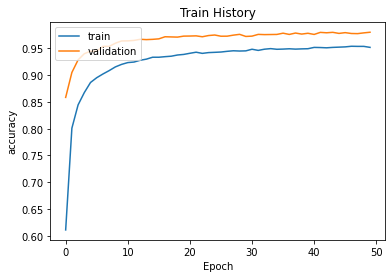

In [34]:
show_train_history(train_history,'accuracy','val_accuracy')

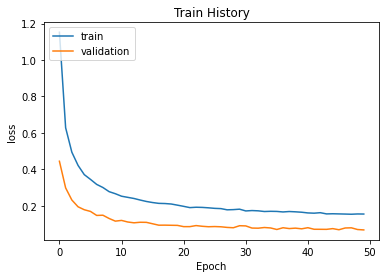

In [35]:
show_train_history(train_history,'loss','val_loss')

# (8) Accuracy

In [36]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0648 - accuracy: 0.9781

accuracy= 0.9781000018119812


# (9) Prediction

In [37]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

In [38]:
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

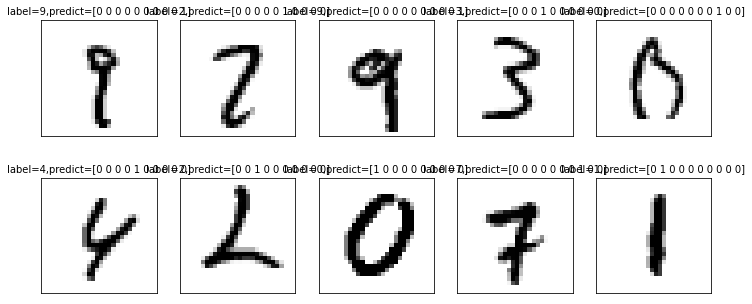

In [39]:
plot_images_labels_prediction(x_test,y_test,
                              predictions,idx=320)

# (10) Confusion matrix

In [40]:
# save and load weights
model.save_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5')

In [41]:
model.save('my_model.h5')  
del model  # deletes the existing model

from keras.models import load_model
model = load_model('my_model.h5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 28, 28, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 36)        14436     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 36)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 36)         